In [44]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
temp=pd.read_csv('cpi.csv')
labels=temp.keys()[:-2]
data=np.array(temp.as_matrix())[:, :-2]
print data
print np.shape(data)
housing_rural=data[0::3, 20]
print housing_rural
cpis_rural=np.concatenate([data[0::3, 3:20], data[0::3, 21:-1]], 1)    #Rural CPIs
print cpis_rural[0::3, 20]
gi_rural=data[0::3, -1]
cpis_urban=data[1::3, 3:-1]    #Urban CPIs
gi_urban=data[1::3, -1]
cpis_overall=data[2::3, 3:-1]   #Overall (rural+urban) CPIs
gi_overall=data[2::3, -1]
#print labels

[['Rural' 2013 'January' ... 104.7 104.0 105.1]
 ['Urban' 2013 'January' ... 104.3 103.7 104.0]
 ['Rural+Urban' 2013 'January' ... 104.5 103.9 104.6]
 ...
 ['Rural' 2017 'July' ... 124.4 128.6 136.2]
 ['Urban' 2017 'July' ... 122.4 123.0 131.8]
 ['Rural+Urban' 2017 'July' ... 123.6 125.9 134.2]]
(165, 30)
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan]
[103.3 104.4 106.8 109.3 110.5 111.2 113.2 112.6 111.0 111.9 114.1 113.8
 113.6 114.4 116.4 117.8 119.1 119.2 119.1]


In [17]:
print gi_rural

[105.1 105.8 106.0 106.4 107.2 108.9 110.7 112.1 114.2 115.5 117.4 115.5
 114.2 114.0 114.6 115.4 116.0 117.0 119.5 120.7 120.9 121.0 121.1 120.3
 120.3 120.6 121.1 121.5 122.4 124.1 124.7 126.1 127.0 127.7 128.3 127.9
 128.1 127.9 128.0 129.0 130.3 131.9 133.0 133.5 133.4 133.8 133.6 132.8
 132.4 132.6 132.8 132.9 133.3 133.9 136.2]


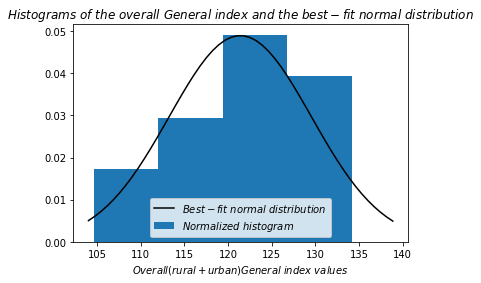

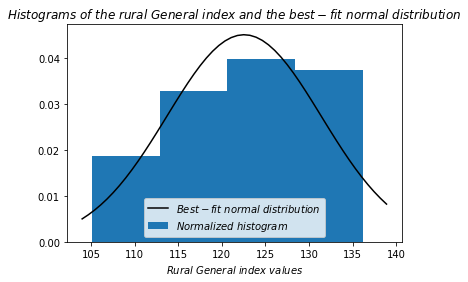

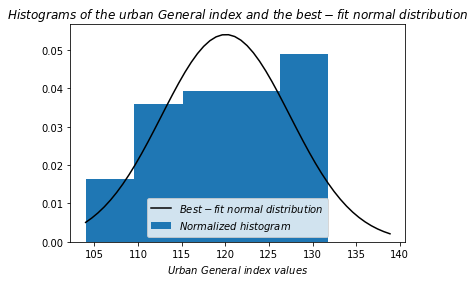

In [18]:
plt.figure(0)
plt.hist(gi_overall, np.histogram(gi_overall, bins='fd')[1], normed=True)    #Setting bins using Freedman rule
gi_overall_mu, gi_overall_sigma=stats.norm.fit(gi_overall)
gi_overall_range=np.linspace(104, 138.88)
plt.plot(gi_overall_range, stats.norm(gi_overall_mu, gi_overall_sigma).pdf(gi_overall_range), 'k')
plt.title('$Histograms\ of\ the\ overall\ General\ index\ and\ the\ best-fit\ normal\ distribution$')
plt.xlabel('$Overall (rural+urban) General\ index\ values$')
plt.legend(['$Best-fit\ normal\ distribution$', '$Normalized\ histogram$'])

plt.figure(1)
plt.hist(gi_rural, np.histogram(gi_rural, bins='fd')[1], normed=True)    #Setting bins using Freedman rule
gi_rural_mu, gi_rural_sigma=stats.norm.fit(gi_rural)
gi_rural_range=np.linspace(104, 138.88)
plt.plot(gi_rural_range, stats.norm(gi_rural_mu, gi_rural_sigma).pdf(gi_rural_range), 'k')
plt.title('$Histograms\ of\ the\ rural\ General\ index\ and\ the\ best-fit\ normal\ distribution$')
plt.xlabel('$Rural\ General\ index\ values$')
plt.legend(['$Best-fit\ normal\ distribution$', '$Normalized\ histogram$'])

plt.figure(2)
plt.hist(gi_urban, np.histogram(gi_urban, bins='fd')[1], normed=True)    #Setting bins using Freedman rule
gi_urban_mu, gi_urban_sigma=stats.norm.fit(gi_urban)
gi_urban_range=np.linspace(104, 138.88)
plt.plot(gi_urban_range, stats.norm(gi_urban_mu, gi_urban_sigma).pdf(gi_urban_range), 'k')
plt.title('$Histograms\ of\ the\ urban\ General\ index\ and\ the\ best-fit\ normal\ distribution$')
plt.xlabel('$Urban\ General\ index\ values$')
plt.legend(['$Best-fit\ normal\ distribution$', '$Normalized\ histogram$'])

plt.show()

In [19]:
rvs_gi_overall=stats.norm(gi_overall_mu, gi_overall_sigma).rvs(1000000)
k, p=stats.ks_2samp(gi_overall, rvs_gi_overall)
print 'Kolomogrov-Smirnov test to the overall (rural+urban) general index values:'
print 'k =', k, ' p =', p
rvs_gi_rural=stats.norm(gi_rural_mu, gi_rural_sigma).rvs(1000000)
k, p=stats.ks_2samp(gi_rural, rvs_gi_overall)
print 'Kolomogrov-Smirnov test to the rural general index values:'
print 'k =', k, ' p =', p
rvs_gi_urban=stats.norm(gi_urban_mu, gi_urban_sigma).rvs(1000000)
k, p=stats.ks_2samp(gi_urban, rvs_gi_overall)
print 'Kolomogrov-Smirnov test to the urban general index values:'
print 'k =', k, ' p =', p

Kolomogrov-Smirnov test to the overall (rural+urban) general index values:
k = 0.11346800000000001  p = 0.45508179171711344
Kolomogrov-Smirnov test to the rural general index values:
k = 0.18008500000000005  p = 0.04954223424685256
Kolomogrov-Smirnov test to the urban general index values:
k = 0.13095518181818178  p = 0.28217747636112916


In [34]:
np.savetxt('test.out', cpis_rural, delimiter=',')
#r_spearman=stats.spearmanr(cpis_rural, cpis_urban, axis=0, nan_policy='omit')
#print r_spearman